In [93]:
import cv2
import matplotlib.pyplot as plt


def show(*image: cv2.typing.MatLike, plot_size=6, bgr=True):
    """Draw several images in a row in full size"""
    plt.figure(figsize=(plot_size * len(image), plot_size))
    for i, img in enumerate(image):
        plt.subplot(1, len(image), i + 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB) if bgr else img)
    plt.show()

In [45]:
import sys

to_add = "/home/projects/webrtc-cv/headless-render"
if to_add not in sys.path:
    sys.path.append(to_add)

In [46]:
sys.path

['/usr/lib/python312.zip',
 '/usr/lib/python3.12',
 '/usr/lib/python3.12/lib-dynload',
 '',
 '/home/projects/webrtc-cv/.venv/lib/python3.12/site-packages',
 '/home/projects/webrtc-cv/headless-render']

In [44]:
del sys.path[-1]

In [95]:
import importlib
import render
importlib.reload(render)

<module 'render' from '/home/projects/webrtc-cv/headless-render/render.py'>

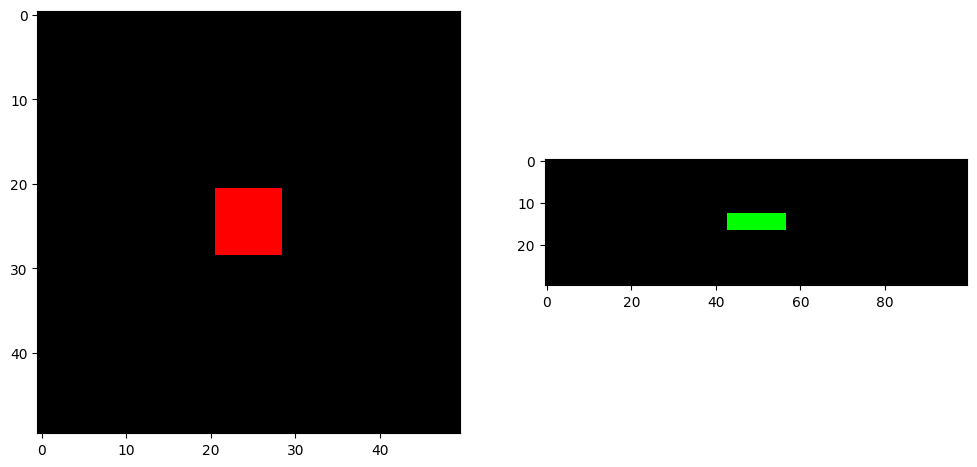

In [97]:
img_array = render.render_threejs_scene_to_numpy(50, 50, "red")
img_array2 = render.render_threejs_scene_to_numpy(100, 30, "not_red")
show(img_array, img_array2)